2023/3/5<br>
This code is for result visualization

In [1]:
import os
import glob
import copy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
current_path=os.getcwd()
npz_path=os.path.join(current_path, "npz_file")
npz_pred_path=os.path.join(npz_path, "pred_im_concatenation")
npz_segmentation_path=os.path.join(npz_path, "segmentation")
fig_save_path=os.path.join(current_path, "fig_save", "result_visualization")

if os.path.exists(fig_save_path)==False:
    os.makedirs(fig_save_path)

In [3]:
npz_path_list=glob.glob(os.path.join(npz_pred_path, "*.npz"))
npz_segmentation_path_list=glob.glob(os.path.join(npz_segmentation_path, "*.npz"))

npz_list=[]
for npz_path in npz_path_list:
    npz=np.load(npz_path)
    npz_list.append(npz)
    
npz_segmentation_list=[]
for npz_segmentation_path in npz_segmentation_path_list[:7]:
    npz_segmentation=np.load(npz_segmentation_path)
    npz_segmentation_list.append(npz_segmentation)

Result visualization

In [55]:
#load data
MFA=npz_list[6]["MFA"]
angle=npz_list[6]["angle"]
pred_binary=npz_list[6]["pred_binary"]
nuclei=npz_segmentation_list[6]["nuclei"]

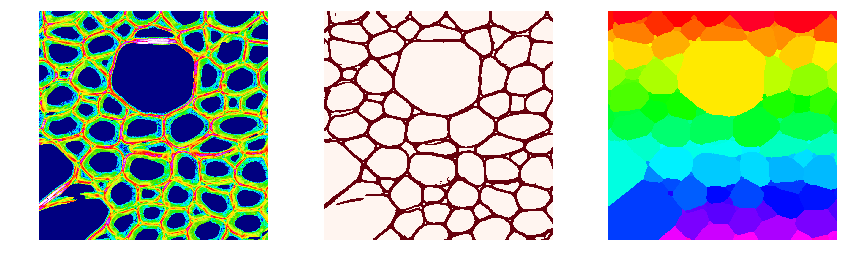

In [5]:
fig, ax =plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(MFA[1300:2300, 500:1500], cmap="gist_ncar", vmin=0, vmax=60)
ax[0].axis("off")
ax[1].imshow(pred_binary[1300:2300, 500:1500], cmap="Reds")
ax[1].axis("off")
ax[2].imshow(nuclei[1300:2300, 500:1500], cmap="gist_rainbow")
ax[2].axis("off")
plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample05_segmentation.png"), dpi=1200)
plt.show()
plt.close()

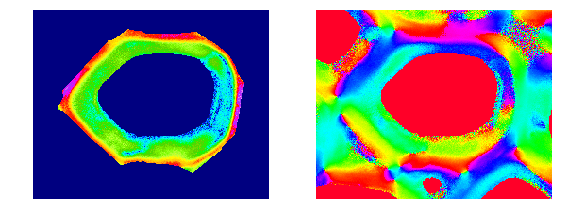

In [6]:
target_cell_ind=np.where(nuclei!=1202)
MFA_copy=copy.deepcopy(MFA)
MFA_copy[target_cell_ind]=0

fig, ax =plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(MFA_copy[1870:2070, 650:900], cmap="gist_ncar", vmin=0, vmax=60)
ax[0].axis("off")
ax[1].imshow(angle[1870:2070, 650:900], cmap="gist_rainbow")
ax[1].axis("off")
#fig.colorbar(im, ax=ax[1])
#ax.axis("off")
plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample05_segmentation_expand.png"), dpi=1200)
plt.show()
plt.close()

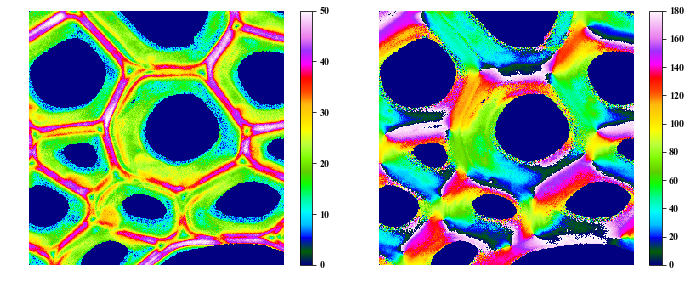

In [74]:
fig, ax=plt.subplots(1, 2, figsize=(10, 4))
im0=ax[0].imshow(MFA[500:800, 1400:1700], cmap="gist_ncar", vmin=0, vmax=50)
ax[0].axis("off")
fig.colorbar(im0, ax=ax[0])
im1=ax[1].imshow(angle[500:800, 1400:1700], cmap="gist_ncar", vmin=0, vmax=180)
ax[1].axis("off")
fig.colorbar(im1, ax=ax[1])
plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample05_MFA_azimuth.png"), dpi=1200)
plt.show()
plt.close()

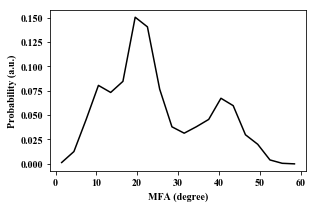

In [7]:
hist, bins=np.histogram(MFA_copy[1000:2000, 500:1500].flatten(), range=(0.01, 60), bins=20)
bins_hist=[np.mean([bins[i], bins[i+1]]) for i in range(len(hist))]

plt.rcParams["font.family"]="Times New Roman"
plt.figure(figsize=(4.5, 3))
plt.plot(bins_hist, hist/np.sum(hist), c="black")
plt.ylabel("Probability (a.u.)")
plt.xlabel("MFA (degree)")
plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample05_expand_MFA_hist.png"), dpi=600)
plt.show()
plt.close()

Visualization of MFA disturbance

In [75]:
#load data
MFA=npz_list[3]["MFA"]
angle=npz_list[3]["angle"]

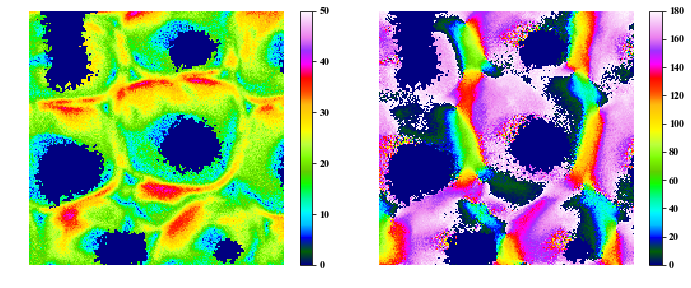

In [77]:
fig, ax=plt.subplots(1, 2, figsize=(10, 4))
im0=ax[0].imshow(MFA[3200:3400, 200:400], cmap="gist_ncar", vmin=0, vmax=50)
ax[0].axis("off")
fig.colorbar(im0, ax=ax[0])
im1=ax[1].imshow(angle[3200:3400, 200:400], cmap="gist_ncar")
ax[1].axis("off")
fig.colorbar(im1, ax=ax[1])
plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample03_MFA_azimuth.png"), dpi=1200)
plt.show()
plt.close()